In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
pop=pd.read_csv('/content/drive/MyDrive/Technocolab/data.csv')

In [ ]:
pop.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [31]:
pop1=pop.drop(['id','name','artists','release_date'],axis=1)

In [21]:
pop1.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.995,0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,0,0.0506,118.469,0.7790,1928
1,0.994,0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,0,0.0462,83.972,0.0767,1928
2,0.604,0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,0,0.9290,107.177,0.8800,1928
3,0.995,0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,0,0.0926,108.003,0.7200,1928
4,0.990,0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,1,0.0424,62.149,0.0693,1928


In [5]:
a=np.sort(pop1.popularity.unique())
a

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  99, 100])

In [6]:
target = pop1['popularity']

In [7]:
ar = target.to_list()

In [8]:
def unique(ar): 
    unique_list = [] 
      
    for x in ar: 
        if x not in unique_list: 
            unique_list.append(x) 
    for x in unique_list: 
        print (x)

In [ ]:
type(ar)

list

In [9]:
for i,ar[i] in enumerate(ar):
    if ar[i]>=0 and ar[i]<=10:
        ar[i] = 0
    elif ar[i]>=11 and ar[i]<=20:
        ar[i] = 1
    elif ar[i]>=21 and ar[i]<=30:
        ar[i] = 2
    elif ar[i]>=31 and ar[i]<=40:
        ar[i] = 3
    elif ar[i]>=41 and ar[i]<=50:
        ar[i] = 4
    elif ar[i]>=51 and ar[i]<=60:
        ar[i] = 5
    elif ar[i]>=61 and ar[i]<=70:
        ar[i] = 6
    elif ar[i]>=71 and ar[i]<=80:
        ar[i] = 7
    elif ar[i]>=81 and ar[i]<=90:
        ar[i] = 8
    else:
        ar[i] = 9

In [10]:
unique(ar)

0
1
2
4
3
5
6
7
8
9


In [32]:
pop1=pop1.drop(['popularity'],axis=1)

In [33]:
pop1['popularity'] = ar

In [34]:
pop1

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,popularity
0,0.9950,0.708,158648,0.1950,0,0.563000,10,0.1510,-12.428,1,0.0506,118.469,0.7790,1928,0
1,0.9940,0.379,282133,0.0135,0,0.901000,8,0.0763,-28.454,1,0.0462,83.972,0.0767,1928,0
2,0.6040,0.749,104300,0.2200,0,0.000000,5,0.1190,-19.924,0,0.9290,107.177,0.8800,1928,0
3,0.9950,0.781,180760,0.1300,0,0.887000,1,0.1110,-14.734,0,0.0926,108.003,0.7200,1928,0
4,0.9900,0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,0.0424,62.149,0.0693,1928,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,1,0.1430,100.012,0.3060,2020,7
169905,0.0167,0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,0.0403,128.000,0.2700,2020,6
169906,0.5380,0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,0.1050,123.700,0.1530,2020,6
169907,0.0714,0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,0.0385,129.916,0.4720,2020,6


In [41]:
pop1.popularity.value_counts()

0    40468
4    29027
3    28300
2    23536
5    20241
1    12720
6    11801
7     3359
8      422
9       35
Name: popularity, dtype: int64

**Here the frequency of 0's, 4's and 3's are comparatively higher as compared to 8's and 9's.**

In [65]:
x=pop1.drop(['popularity'],axis=1)
y=pop1['popularity']

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
rfc=RandomForestClassifier(n_estimators = 100, random_state = 1)
rfc.fit(x_train,y_train)
rfc_predict = rfc.predict(x_test)

In [38]:
print(confusion_matrix(y_test, rfc_predict))

[[11158   784    68     6     1     0    20    10     2     0]
 [  913  1921   802   118    14     2     3     0     0     0]
 [  281  1016  3444  2071   213    20     9     1     1     0]
 [  126   465  2435  3601  1840   144    16     4     0     0]
 [   27   198  1136  2243  4041  1061    53     9     0     0]
 [   14    87   423   956  2334  1702   501    20     2     0]
 [    6    25   162   289   777   805  1417    63     2     0]
 [    3     5    28    56   116   154   527    67     6     0]
 [    0     0     2     2     7    11    90    22     4     0]
 [    0     0     0     0     0     0     8     1     2     0]]


In [67]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      8099
           1       0.43      0.52      0.47      2481
           2       0.41      0.50      0.45      4632
           3       0.39      0.43      0.41      5609
           4       0.45      0.47      0.46      5888
           5       0.45      0.28      0.34      4127
           6       0.53      0.40      0.46      2362
           7       0.29      0.06      0.11       685
           8       0.33      0.07      0.11        92
           9       0.00      0.00      0.00         7

    accuracy                           0.54     33982
   macro avg       0.42      0.37      0.37     33982
weighted avg       0.54      0.54      0.53     33982



**Here, the accuracy comes out to be 54 % just because uneven distribution of frequencies of observations in the target variable.**

In [68]:
rfc.feature_importances_

array([0.09477711, 0.06088487, 0.0682086 , 0.07464129, 0.00488152,
       0.05102911, 0.03721901, 0.05998166, 0.07508221, 0.00951938,
       0.06485827, 0.06023726, 0.0608039 , 0.27787579])

Feature: 0, Score: 0.09478
Feature: 1, Score: 0.06088
Feature: 2, Score: 0.06821
Feature: 3, Score: 0.07464
Feature: 4, Score: 0.00488
Feature: 5, Score: 0.05103
Feature: 6, Score: 0.03722
Feature: 7, Score: 0.05998
Feature: 8, Score: 0.07508
Feature: 9, Score: 0.00952
Feature: 10, Score: 0.06486
Feature: 11, Score: 0.06024
Feature: 12, Score: 0.06080
Feature: 13, Score: 0.27788


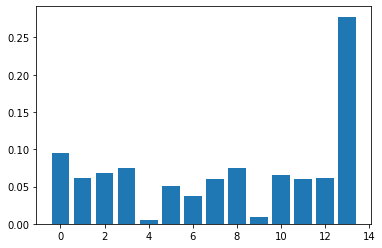

In [69]:
importance = rfc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**By using this above plot one can easily observe the important features in predicting the target variable. So one can consecutively reduce the unimportant features and remodelling the data for predicting the target variable i.e. popularity. For example here by observing the graph one determine that 4th and 9th features are contributing less in predicting the target variable.**

In [80]:
x.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'year'],
      dtype='object')

In [82]:
pop2=pop1.drop(['explicit','key','mode'],axis=1)
x1=pop2.drop(['popularity'],axis=1)
y1=pop2['popularity']

In [83]:
#Train test splitting
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2)

#fitting the model
rfc=RandomForestClassifier(n_estimators = 100, random_state = 1)
rfc.fit(x1_train,y1_train)
rfc_predict = rfc.predict(x1_test)

In [84]:
print(classification_report(y1_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      8145
           1       0.43      0.50      0.46      2538
           2       0.41      0.50      0.45      4688
           3       0.39      0.43      0.41      5629
           4       0.45      0.46      0.46      5851
           5       0.44      0.29      0.35      4048
           6       0.53      0.37      0.44      2348
           7       0.30      0.08      0.12       642
           8       0.25      0.05      0.08        85
           9       0.00      0.00      0.00         8

    accuracy                           0.54     33982
   macro avg       0.41      0.36      0.37     33982
weighted avg       0.54      0.54      0.53     33982



Feature: 0, Score: 0.10370
Feature: 1, Score: 0.06565
Feature: 2, Score: 0.07295
Feature: 3, Score: 0.07689
Feature: 4, Score: 0.05441
Feature: 5, Score: 0.06431
Feature: 6, Score: 0.08077
Feature: 7, Score: 0.06997
Feature: 8, Score: 0.06443
Feature: 9, Score: 0.06521
Feature: 10, Score: 0.28172


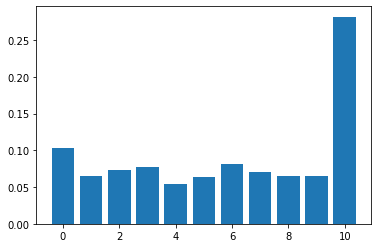

In [85]:
importance = rfc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([k for k in range(len(importance))], importance)
plt.show()

**Now here, 4th feature contribute less in predicting the target variable so we can just remove it and try to remodel the dataset. Similarly, we can continue this process unitill we get the features which are contributing well enough in predicting the target variable.**

In [86]:
x1.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [87]:
pop3=pop2.drop(['instrumentalness'],axis=1)

In [88]:
x2=pop3.drop(['popularity'],axis=1)
y2=pop3['popularity']
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2)
rfc=RandomForestClassifier(n_estimators = 100, random_state = 1)
rfc.fit(x2_train,y2_train)
rfc_predict = rfc.predict(x2_test)
print(classification_report(y2_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      8070
           1       0.42      0.52      0.46      2441
           2       0.41      0.50      0.45      4734
           3       0.39      0.43      0.41      5748
           4       0.43      0.46      0.44      5793
           5       0.43      0.27      0.33      4025
           6       0.54      0.39      0.46      2409
           7       0.32      0.09      0.14       668
           8       0.20      0.04      0.06        84
           9       0.00      0.00      0.00        10

    accuracy                           0.54     33982
   macro avg       0.40      0.36      0.37     33982
weighted avg       0.54      0.54      0.53     33982



Feature: 0, Score: 0.10568
Feature: 1, Score: 0.06995
Feature: 2, Score: 0.07806
Feature: 3, Score: 0.08092
Feature: 4, Score: 0.06930
Feature: 5, Score: 0.08530
Feature: 6, Score: 0.07416
Feature: 7, Score: 0.06979
Feature: 8, Score: 0.07018
Feature: 9, Score: 0.29666


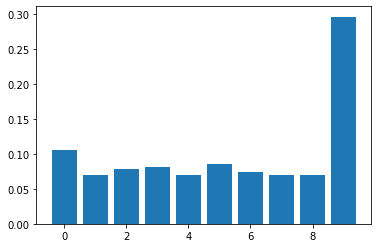

In [90]:
importance = rfc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([k for k in range(len(importance))], importance)
plt.show()

In [92]:
x2.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'liveness',
       'loudness', 'speechiness', 'tempo', 'valence', 'year'],
      dtype='object')

**So here, from the graph we can observe that 9th feature i.e. "year" contributing highest in predicting the target variable and all other features contribute almost similar amount in prediction.**

**So following are the features which are contributing well enough in prediciting the popularity of songs :**

1.   **'acousticness'**
2.   **'danceability'**
3.   **'duration_ms'**
4.   **'energy'**
5.   **'liveness'**
6.   **'loudness'**
7.   **'speechiness'**
8.   **'tempo'**
9.   **'valence'**
10.  **'year'**